<a href="https://colab.research.google.com/github/albina2323/calkulator/blob/main/%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8594 - loss: 0.4768 - val_accuracy: 0.9552 - val_loss: 0.1558
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9608 - loss: 0.1311 - val_accuracy: 0.9635 - val_loss: 0.1265
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9743 - loss: 0.0889 - val_accuracy: 0.9718 - val_loss: 0.0939
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9834 - loss: 0.0571 - val_accuracy: 0.9746 - val_loss: 0.0848
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9864 - loss: 0.0441 - val_accuracy: 0.9762 - val_loss: 0.0820
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9715 - loss: 0.0896
Точность на тестовых данных: 97.53%
Введите цифру (0-9), которую хотите предсказать: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Число на изображении: 8, Предсказание: 2


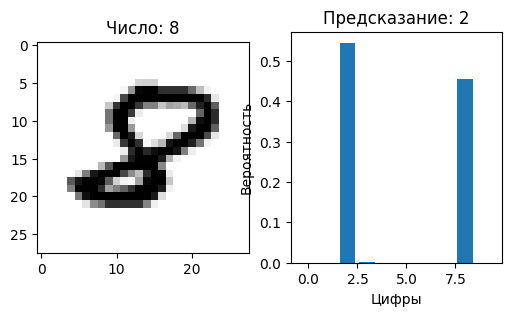

2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

def load_and_prepare_data():
    """Загружает и нормализует данные MNIST."""
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0  # Нормализация
    return (x_train, y_train), (x_test, y_test)

def build_model():
    """Создаёт и компилирует нейросетевую модель."""
    model = keras.Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def train_model(model, x_train, y_train):
    """Обучает модель."""
    model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

def evaluate_model(model, x_test, y_test):
    """Оценивает точность модели на тестовых данных."""
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f"Точность на тестовых данных: {test_accuracy * 100:.2f}%")

def predict_digit(model, x_test, y_test, digit):
    """Ищет первую встреченную цифру и предсказывает её."""
    for i in range(len(y_test)):
        if y_test[i] == digit:
            x = np.expand_dims(x_test[i], axis=0)
            prediction = model.predict(x)
            predicted_digit = np.argmax(prediction[0])

            print(f"Число на изображении: {y_test[i]}, Предсказание: {predicted_digit}")

            plt.figure(figsize=(6, 3))
            plt.subplot(1, 2, 1)
            plt.imshow(x_test[i], cmap=plt.cm.binary)
            plt.title(f"Число: {y_test[i]}")

            plt.subplot(1, 2, 2)
            plt.bar(range(10), prediction[0])
            plt.title(f"Предсказание: {predicted_digit}")
            plt.xlabel("Цифры")
            plt.ylabel("Вероятность")
            plt.show()

            return predicted_digit

    print(f"Цифра {digit} не найдена в тестовых данных.")
    return None

# Запуск процесса обучения и тестирования
(x_train, y_train), (x_test, y_test) = load_and_prepare_data()
model = build_model()
train_model(model, x_train, y_train)
evaluate_model(model, x_test, y_test)

user_digit = int(input("Введите цифру (0-9), которую хотите предсказать: "))
predict_digit(model, x_test, y_test, user_digit)
